# Seminar 14
## Plan
- Boxplot
- Bivariate distributions
- JointGrid
- Pairgrid

## Boxplot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

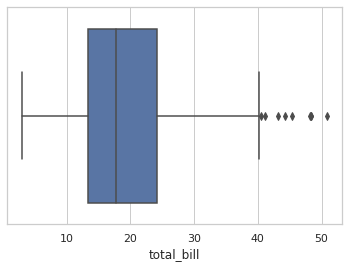

In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

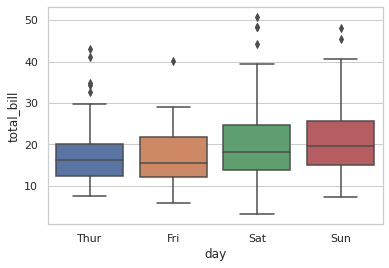

In [2]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

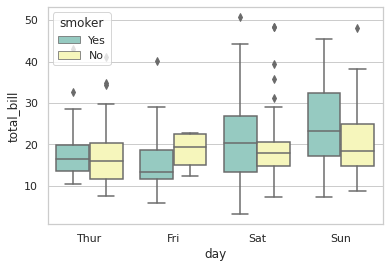

In [3]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

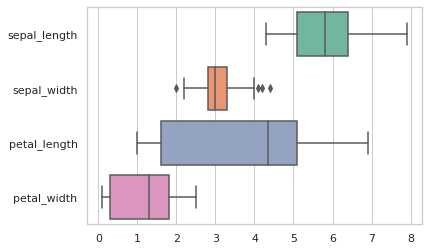

In [4]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

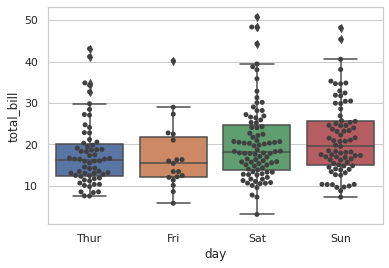

In [6]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

Use catplot() to combine a boxplot() and a FacetGrid. 

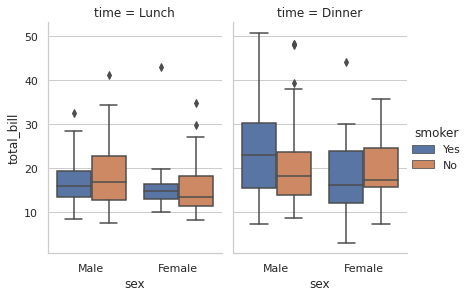

In [9]:
g = sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="box", height=4, aspect=.7);

## Visualizing bivariate distributions
All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution:

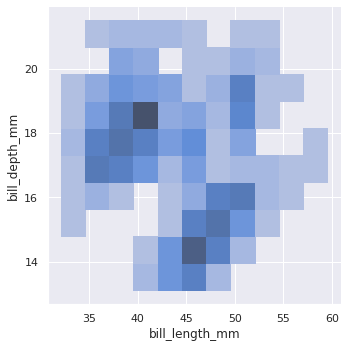

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analagous to a heatmap()). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density:

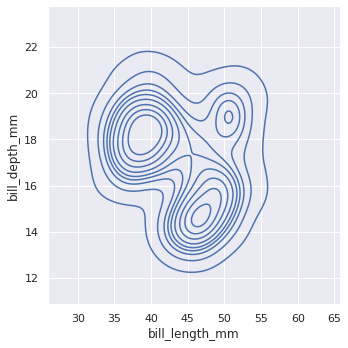

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

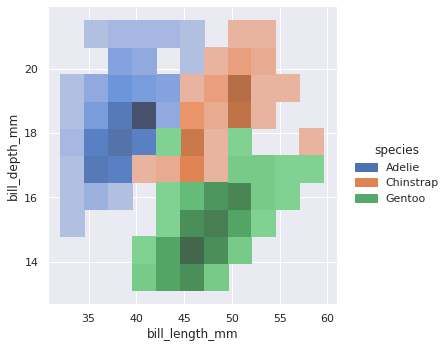

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

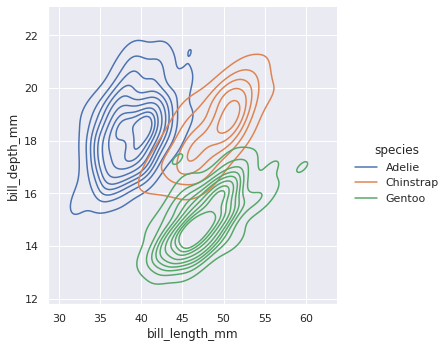

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

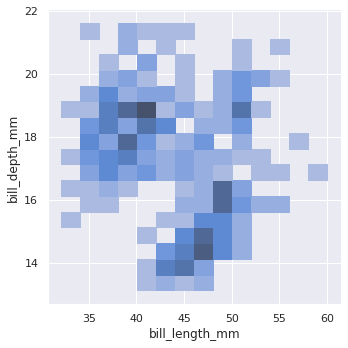

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))


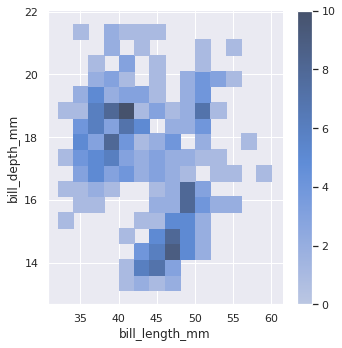

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

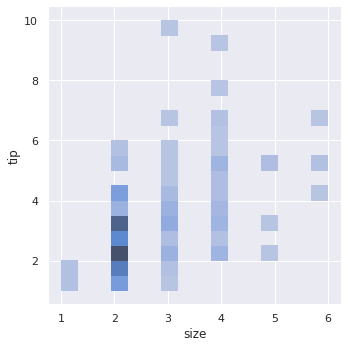

In [ ]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size", y="tip")

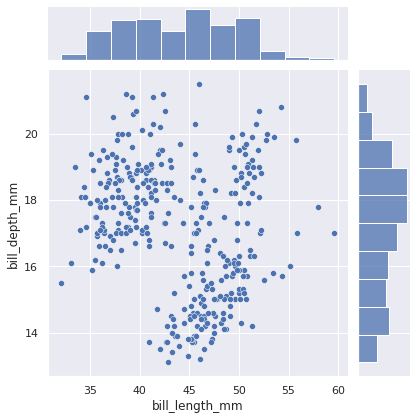

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Similar to displot(), setting a different kind="kde" in jointplot() will change both the joint and marginal plots the use kdeplot():

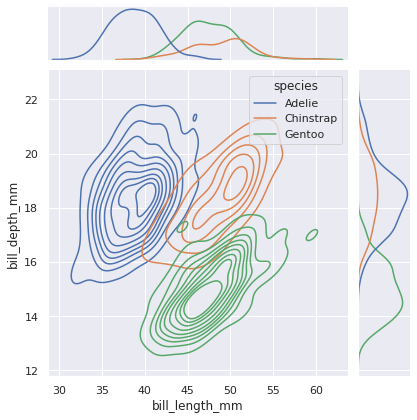

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into displot():

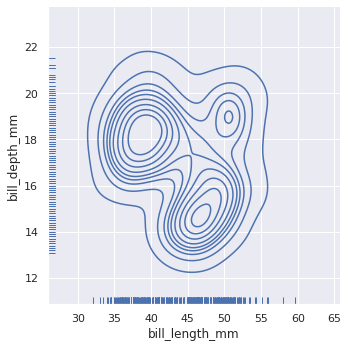

In [ ]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

### JointGrid

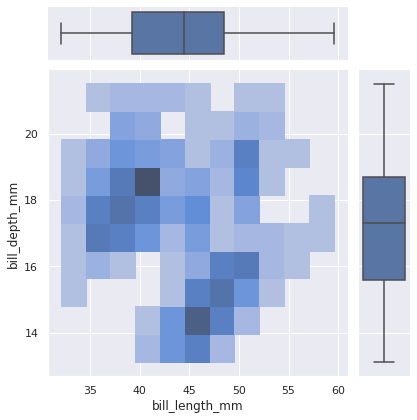

In [ ]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [12]:
penguins = sns.load_dataset("penguins")

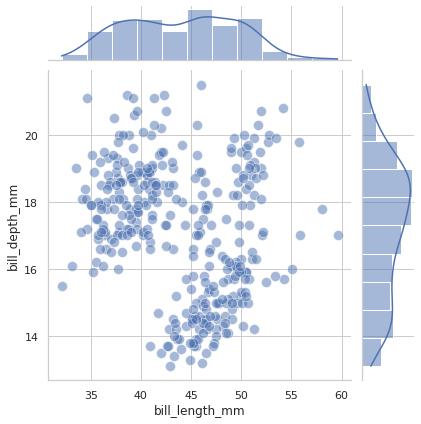

In [13]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

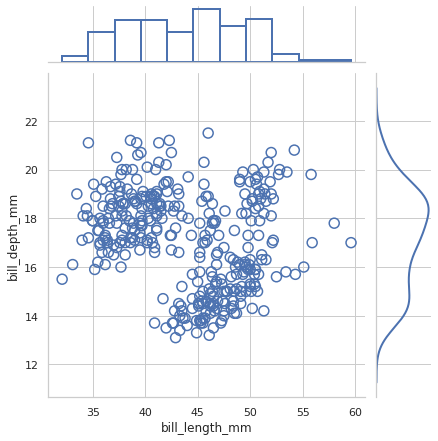

In [14]:
g = sns.JointGrid()
x, y = penguins["bill_length_mm"], penguins["bill_depth_mm"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

### PairGrid

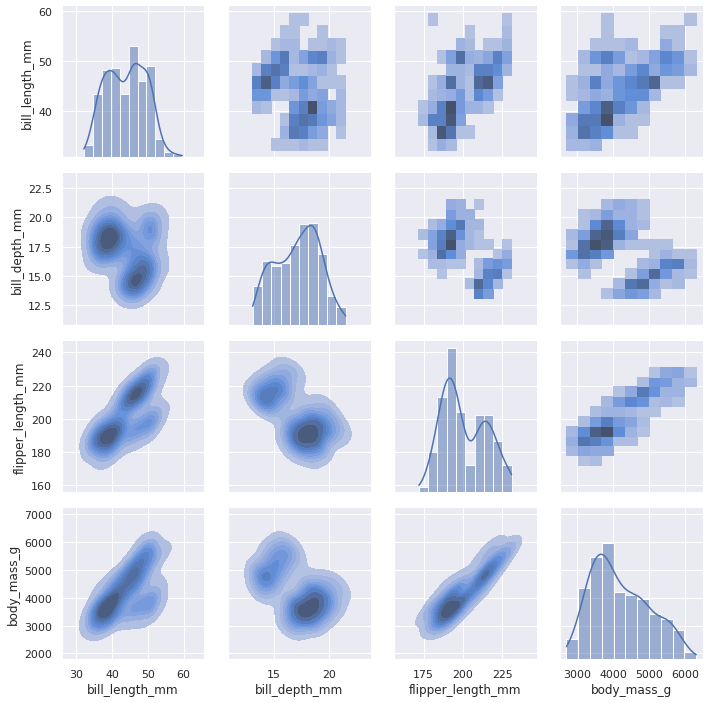

In [ ]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)